In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split , cross_val_score ,GridSearchCV


In [3]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 17\SalaryData_Test(1).csv")
data.head(4)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


<Axes: xlabel='Salary', ylabel='count'>

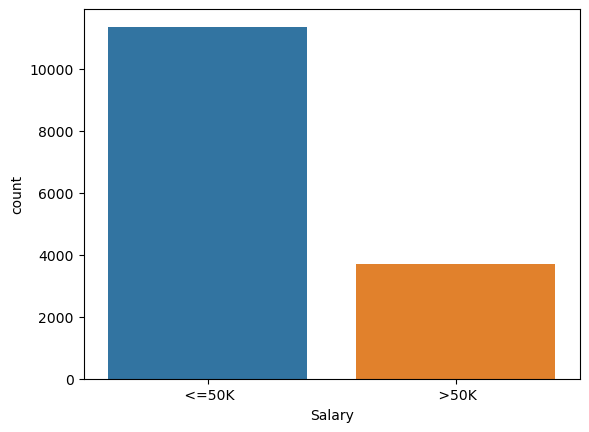

In [4]:
sns.countplot(x=data['Salary'])

In [5]:
le = LabelEncoder()
data['Salary'] = le.fit_transform(data['Salary'])


In [6]:
data = pd.get_dummies(data=data, columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
data = data.astype(int)

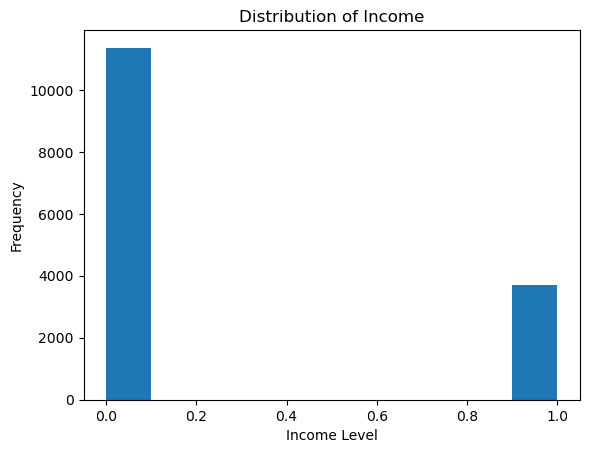

In [7]:
plt.hist(data['Salary'])
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.title('Distribution of Income')
plt.show()

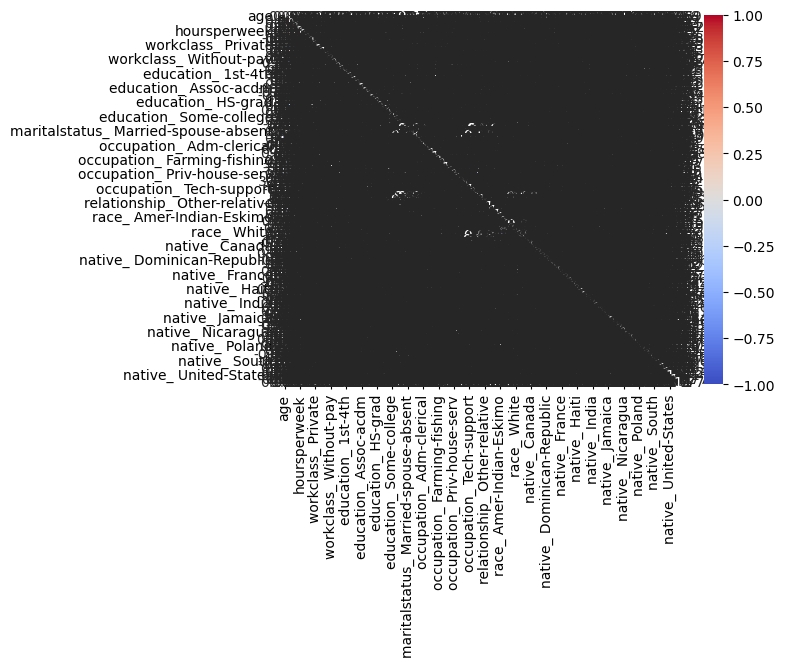

In [8]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.show()

In [9]:
x_train = data.drop(columns='Salary',inplace=False)
y_train = data['Salary']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train, test_size=0.3,random_state=45)

In [11]:
clf = SVC(kernel='rbf',gamma=0.001)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred) *100

In [ ]:
confusion_matrix(y_test, y_pred)

array([[3299,  111],
       [ 556,  552]], dtype=int64)

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      3410
           1       0.83      0.50      0.62      1108

    accuracy                           0.85      4518
   macro avg       0.84      0.73      0.77      4518
weighted avg       0.85      0.85      0.84      4518

